In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df = pd.read_csv('vgsalesnew.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [6]:
df.shape

(16719, 16)

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.rename(columns={'Name':'Game_Name'})

,Game_Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [10]:
df1= df.dropna()
df1.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [11]:
df1.duplicated()

0        False
2        False
3        False
6        False
7        False
         ...  
16667    False
16677    False
16696    False
16700    False
16706    False
Length: 6825, dtype: bool

In [12]:
df1.drop_duplicates()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [13]:
df1.shape

(6825, 16)

In [14]:
#The YEAR WITH THE MOST NUMBER OF GAMES
df1['Year_of_Release'].value_counts()


Year_of_Release
2008.0    592
2007.0    590
2005.0    562
2009.0    550
2006.0    528
2003.0    498
2004.0    476
2002.0    455
2011.0    453
2010.0    429
2012.0    313
2013.0    266
2001.0    256
2014.0    253
2016.0    212
2015.0    211
2000.0    102
1999.0     30
1998.0     25
1997.0     13
1996.0      7
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: count, dtype: int64

2008 is the year with the most number of games released

 EACH PLATFORM AND THEIR RATINGS

In [15]:
pd.crosstab(df1.Platform,df1.Rating)

Rating,AO,E,E10+,K-A,M,RP,T
Platform,,,,,,,
3DS,0,54,50,0,11,0,40
DC,0,3,0,0,1,0,10
DS,0,231,140,0,9,0,84
GBA,0,169,18,0,6,0,44
GC,0,167,17,0,34,0,130
PC,0,99,63,0,242,1,246
PS,0,70,0,1,18,0,61
PS2,0,371,78,0,208,0,483
PS3,0,154,101,0,237,0,277


In [16]:
df1['Publisher'].value_counts()

Publisher
Electronic Arts                944
Ubisoft                        496
Activision                     492
Sony Computer Entertainment    316
THQ                            307
                              ... 
Funbox Media                     1
O-Games                          1
Hasbro Interactive               1
NDA Productions                  1
NewKidCo                         1
Name: count, Length: 263, dtype: int64

The Top five publishers by number of published work are Electronic Arts, Ubisoft, Activision, Activision,Sony Computer Entertainment


Publishers and the Genre they cover most

In [17]:
pd.crosstab(df1.Publisher,df1.Genre)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
10TACLE Studios,0,1,0,0,0,0,0,0,0,0,0,0
1C Company,0,0,0,0,0,0,0,1,0,0,0,1
2D Boy,0,0,0,0,0,1,0,0,0,0,0,0
3DO,5,2,0,0,1,0,0,0,3,0,4,0
505 Games,13,3,8,3,0,3,2,9,11,15,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Zoo Games,0,0,0,1,0,1,0,0,1,0,0,0
Zushi Games,0,0,0,0,0,0,0,0,0,0,1,0
bitComposer Games,0,0,0,0,0,0,1,0,0,1,0,0


 Developers and the Genre they cover most

In [18]:
pd.crosstab(df1.Developer,df1.Genre)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Developer,,,,,,,,,,,,
"10tacle Studios, Fusionsphere Systems",0,2,0,0,0,0,0,0,0,0,0,0
"1C, 1C Company",0,0,0,0,0,0,0,0,0,2,0,0
"1C, Ino-Co, 1C Company",0,0,0,0,0,0,0,0,0,1,0,0
1C: Maddox Games,0,0,0,0,0,0,0,0,0,2,0,0
1C:Ino-Co,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
n-Space,2,2,0,0,1,0,0,3,5,0,0,0
neo Software,0,0,0,0,0,0,0,0,1,0,0,0
odenis studio,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


Making sure the Global sales actually equals to the sum of each individual country's sales

In [20]:
 
for x in df1.index: 
  if df1.loc[x,'NA_Sales' ] + df1.loc[x,'EU_Sales' ] + df1.loc[x,'JP_Sales' ] + df1.loc[x,'Other_Sales' ] != df1.loc[x,'Global_Sales' ]:
    df1.loc[x,'Global_Sales'] =df1.loc[x,'NA_Sales' ] + df1.loc[x,'EU_Sales' ] + df1.loc[x,'JP_Sales' ] + df1.loc[x,'Other_Sales' ]
    

In [21]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 1.1+ MB


In [22]:
df1.groupby(['Developer','Platform'])['Global_Sales'].agg('sum')

Developer                              Platform
10tacle Studios, Fusionsphere Systems  DS          0.05
                                       Wii         0.05
1C, 1C Company                         PC          0.03
1C, Ino-Co, 1C Company                 PC          0.01
1C: Maddox Games                       PC          0.10
                                                   ... 
neo Software                           XB          1.22
odenis studio                          DS          0.09
syn Sophia                             3DS         0.72
                                       DS          2.58
zSlide                                 PSP         0.03
Name: Global_Sales, Length: 3274, dtype: float64

In [23]:
df1.groupby(['Developer','Year_of_Release','Name'])['Global_Sales'].agg('mean')

Developer                              Year_of_Release  Name                              
10tacle Studios, Fusionsphere Systems  2008.0           Secret Files: Tunguska                0.05
1C, 1C Company                         2001.0           IL-2 Sturmovik                        0.01
                                       2003.0           IL-2 Sturmovik: Forgotten Battles     0.02
1C, Ino-Co, 1C Company                 2009.0           Majesty 2: The Fantasy Kingdom Sim    0.01
1C: Maddox Games                       2006.0           IL-2 Sturmovik: 1946                  0.05
                                                                                              ... 
neo Software                           2001.0           Max Payne                             1.22
odenis studio                          2007.0           Glory Days 2                          0.09
syn Sophia                             2008.0           Style Savvy                           2.58
                  

In [24]:
df1.groupby(['Developer','Name'])['Global_Sales'].agg('mean')

Developer                              Name                              
10tacle Studios, Fusionsphere Systems  Secret Files: Tunguska                0.05
1C, 1C Company                         IL-2 Sturmovik                        0.01
                                       IL-2 Sturmovik: Forgotten Battles     0.02
1C, Ino-Co, 1C Company                 Majesty 2: The Fantasy Kingdom Sim    0.01
1C: Maddox Games                       IL-2 Sturmovik: 1946                  0.05
                                                                             ... 
neo Software                           Max Payne                             1.22
odenis studio                          Glory Days 2                          0.09
syn Sophia                             Style Savvy                           2.58
                                       Style Savvy: Trendsetters             0.72
zSlide                                 Hot Pixel                             0.03
Name: Global_Sales, Leng

TOP 10 YEARS WITH MOST NUMBERS OF GAMES RELEASED

Text(0, 0.5, 'Count')

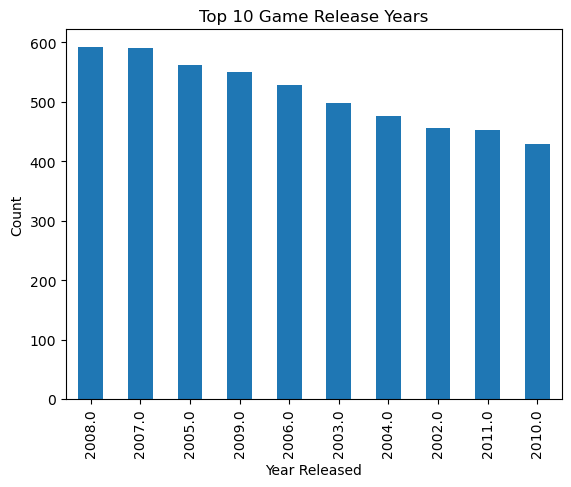

In [25]:
ax = df1['Year_of_Release'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Game Release Years')
ax.set_xlabel('Year Released')
ax.set_ylabel('Count')

TESTING THE CORRELATIONS OF EACH DATABASE FIELD WITH EACH OTHER

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


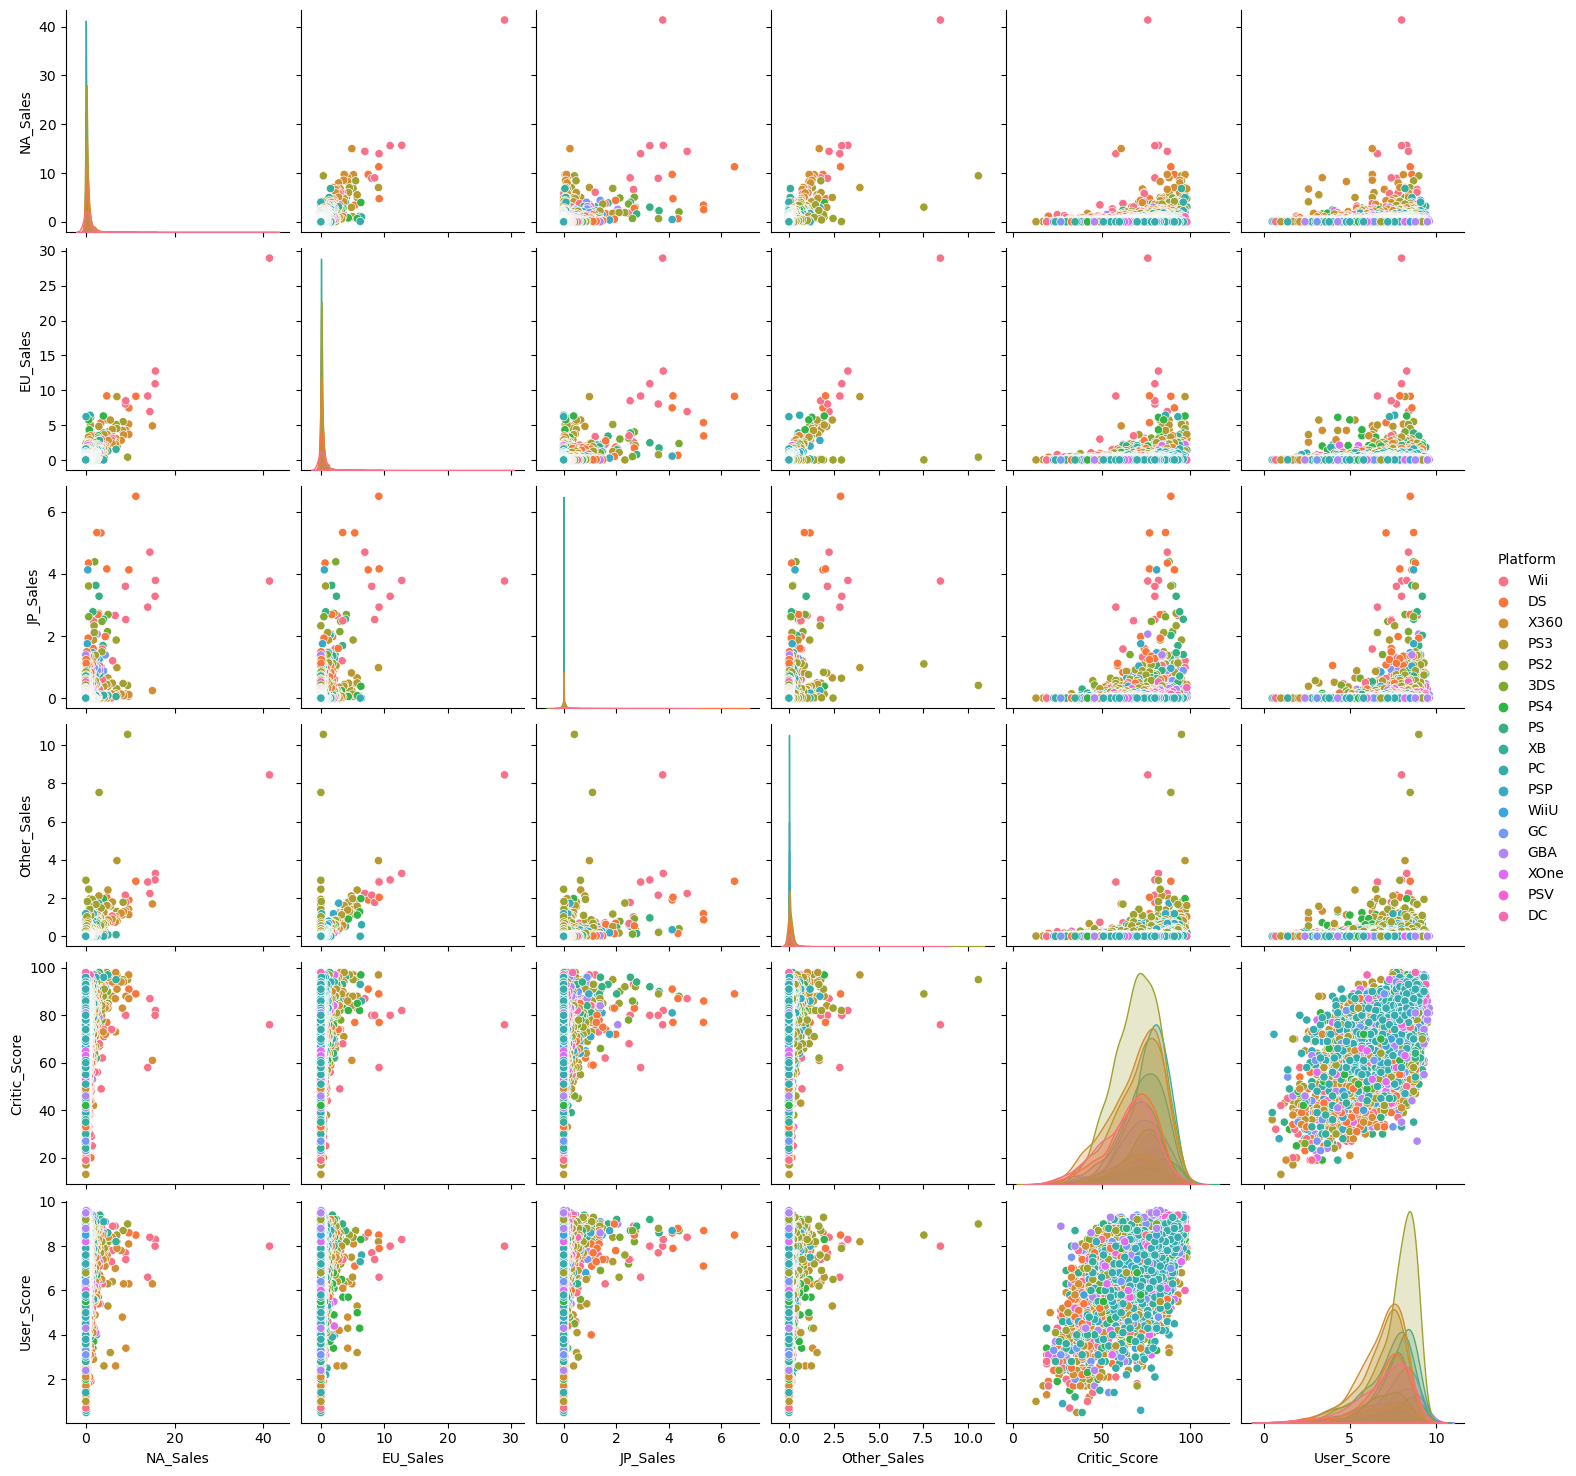

In [26]:
sns.pairplot(df1,
             vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','User_Score'],
            hue='Platform')
plt.show()

In [27]:
df1_corr = df1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','User_Score']].dropna().corr()
df1_corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score
NA_Sales,1.000000,0.841808,0.468607,0.726757,0.233580,0.085796
EU_Sales,0.841808,1.000000,0.519929,0.716330,0.213102,0.055915
JP_Sales,0.468607,0.519929,1.000000,0.394823,0.147314,0.127521
Other_Sales,0.726757,0.716330,0.394823,1.000000,0.191509,0.057083
Critic_Score,0.233580,0.213102,0.147314,0.191509,1.000000,0.580318
User_Score,0.085796,0.055915,0.127521,0.057083,0.580318,1.000000


<Axes: >

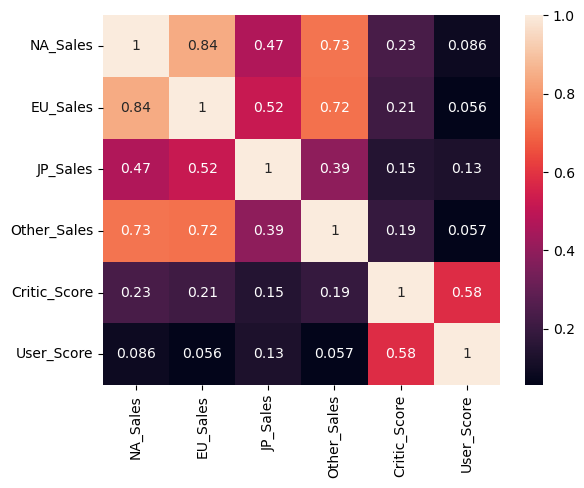

In [28]:
sns.heatmap(df1_corr, annot=True)

In [29]:
df1.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41.0,6.6,129.0,Nintendo,E


In [30]:
df1=df1.reset_index(drop=True).copy()

In [31]:
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41.0,6.6,129.0,Nintendo,E


IDENTIFYING EACH UNIQUE DATE IN THE DATE COLUMN AND THEIR FORMAT

In [32]:
df1['Year_of_Release'].sort_values().unique()

array([1985., 1988., 1992., 1994., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016.])

TOP 10 DEVELOPERS WITH THE HIGHEST CRITIC SCORES

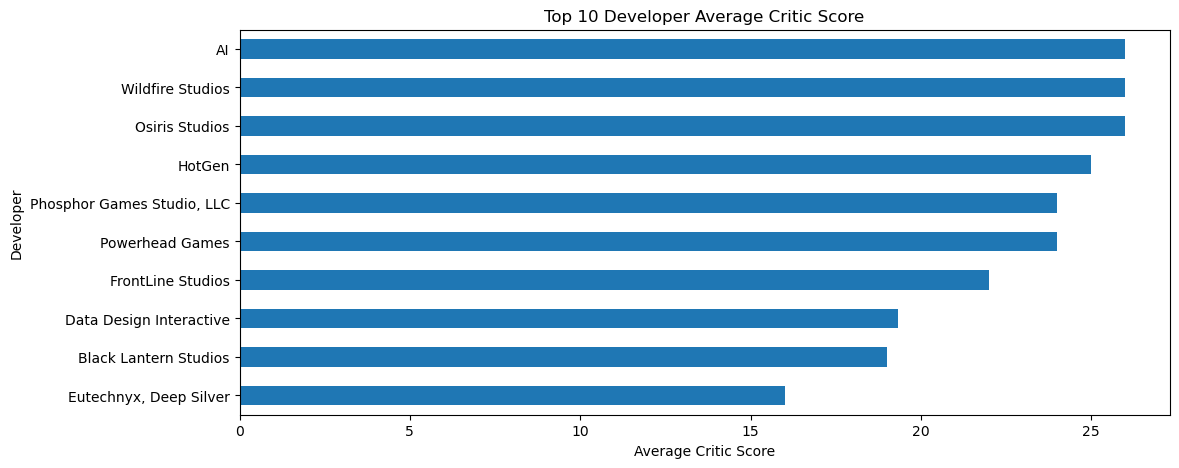

In [33]:
ax =df1.groupby(['Developer'])['Critic_Score'].agg('mean').sort_values().head(10).plot(kind='barh', figsize=(12, 5), title='Top 10 Developer Average Critic Score')
ax.set_xlabel('Average Critic Score')
plt.show()

Identifies the top 10 platforms with the largest Overall Average global sales 

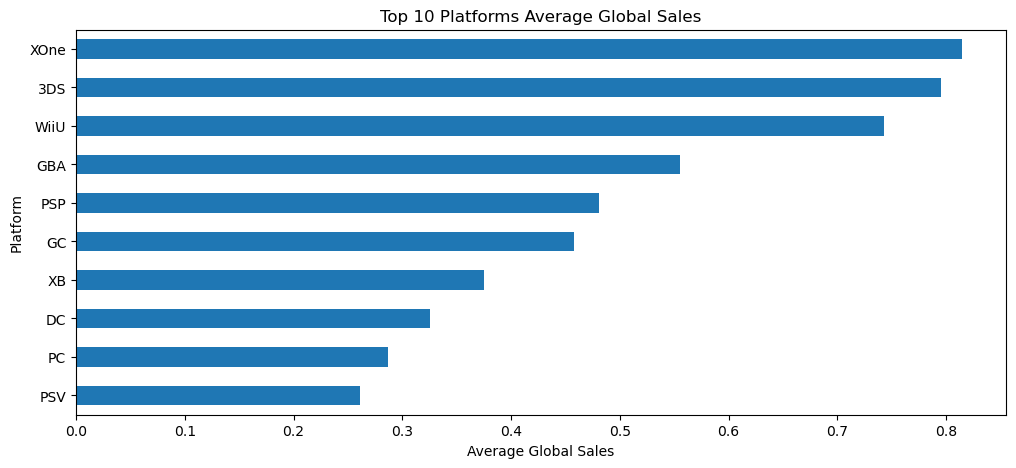

In [34]:
ax =df1.groupby(['Platform'])['Global_Sales'].agg('mean').sort_values().head(10).plot(kind='barh' ,figsize=(12, 5) ,title='Top 10 Platforms Average Global Sales')
ax.set_xlabel('Average Global Sales')
plt.show()

In [35]:
by_year = df1.groupby('Year_of_Release')['Global_Sales'].describe().sort_values(by='count',ascending=False).head(10)
by_year

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,,,,,,,,
2008.0,592.0,0.825794,1.903193,0.01,0.12,0.35,0.930,35.52
2007.0,590.0,0.772847,1.599037,0.01,0.10,0.31,0.730,22.70
2005.0,562.0,0.594537,1.677925,0.01,0.10,0.23,0.530,23.21
2009.0,550.0,0.836018,2.359278,0.01,0.12,0.32,0.750,32.77
2006.0,528.0,0.788920,4.082756,0.01,0.07,0.21,0.520,82.54
2003.0,498.0,0.512369,0.769867,0.01,0.10,0.23,0.570,7.20
2004.0,476.0,0.675987,1.408658,0.01,0.10,0.26,0.715,20.81
2002.0,455.0,0.634505,1.183412,0.01,0.11,0.24,0.625,16.15
2011.0,453.0,0.847108,1.640071,0.01,0.15,0.33,0.840,14.73


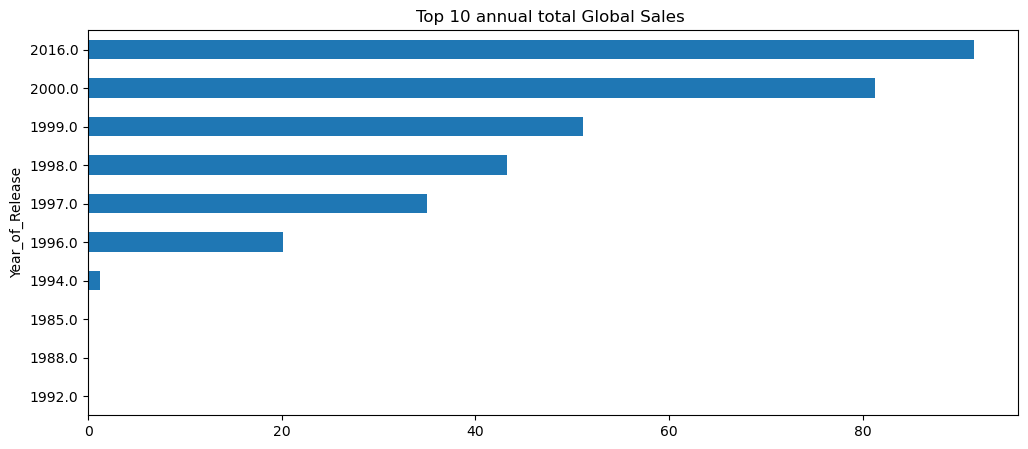

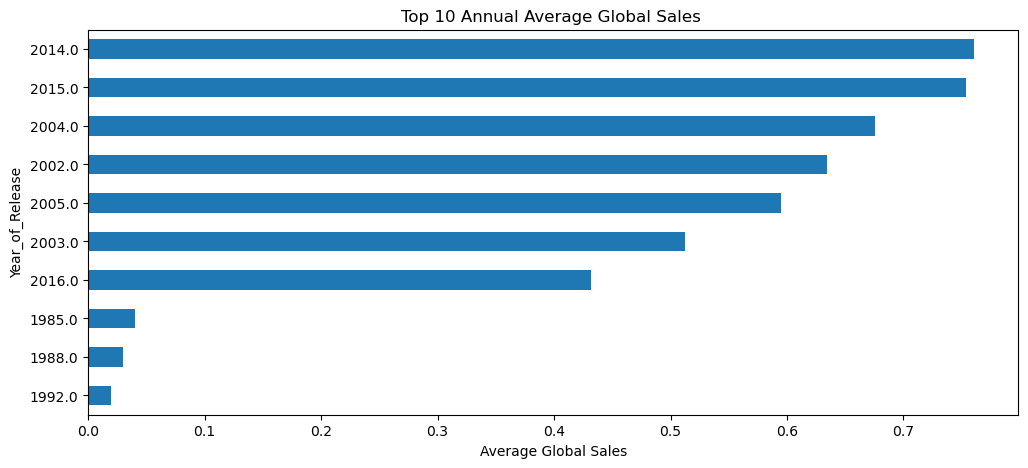

In [36]:
# TOP 10 total GLOBAL sales year

x =df1.groupby(['Year_of_Release'])['Global_Sales'].agg('sum').sort_values().head(10).plot(kind='barh', figsize=(12, 5) ,title='Top 10 annual total Global Sales ')
ax.set_xlabel('Total Global Sales')
plt.show()

#TOP 10 average Global sales year

ax =df1.groupby(['Year_of_Release'])['Global_Sales'].agg('mean').sort_values().head(10).plot(kind='barh', figsize=(12, 5) ,title='Top 10 Annual Average Global Sales ')
ax.set_xlabel('Average Global Sales')
plt.show()

<Axes: xlabel='Global_Sales', ylabel='Year_of_Release'>

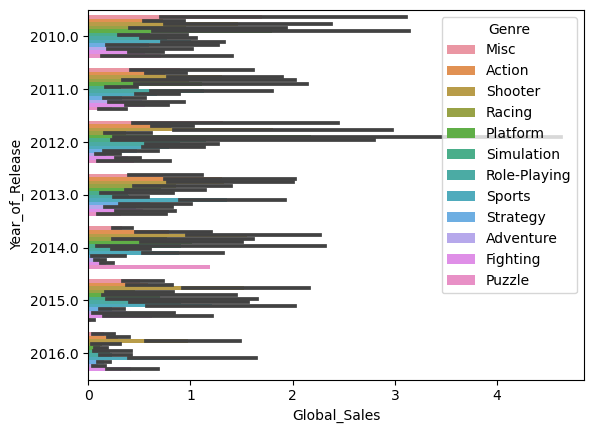

In [37]:

sns.barplot(x='Global_Sales',y='Year_of_Release',hue='Genre',data= df1[df1.Year_of_Release>2009],orient='h')

Creation of new columns Percentage of Global sales from the Respective columns

In [38]:

df1['Perc_NA_Sales'] = (df1['NA_Sales']/df1['Global_Sales'])*100
df1['Perc_EU_Sales'] =(df1['EU_Sales']/df1['Global_Sales'])*100
df1['Perc_JP_Sales'] =(df1['JP_Sales']/df1['Global_Sales'])*100
df1['Perc_Other_Sales'] =(df1['Other_Sales']/df1['Global_Sales'])*100


IDENTIFYING WHAT PROPORTION EACH REGION'S SALES OCCUPIED EACH YEAR

In [39]:

pt = df1.pivot_table(['Perc_NA_Sales','Perc_EU_Sales','Perc_JP_Sales','Perc_Other_Sales'],index=['Year_of_Release'])
pt


,Perc_EU_Sales,Perc_JP_Sales,Perc_NA_Sales,Perc_Other_Sales
Year_of_Release,,,,
1985.0,75.000000,0.000000,0.000000,25.000000
1988.0,66.666667,0.000000,0.000000,33.333333
1992.0,0.000000,0.000000,100.000000,0.000000
1994.0,20.634921,42.063492,30.952381,6.349206
1996.0,35.529165,17.845878,42.002166,4.622791
1997.0,25.626321,23.199716,46.127040,5.046924
1998.0,32.911498,25.706886,36.052821,5.328795
1999.0,33.088591,19.526303,42.041045,5.344061
2000.0,32.258804,16.586250,43.663344,7.491602


Text(0.5, 0, 'Percentage Proportion of Global sales')

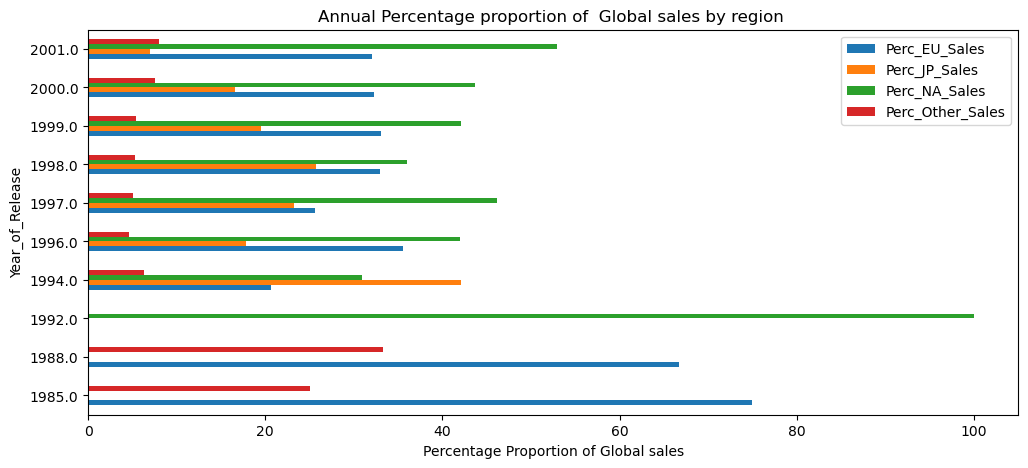

In [40]:
pt.head(10).plot(kind='barh', figsize=(12, 5) ,title='Annual Percentage proportion of  Global sales by region ')\
.set_xlabel('Percentage Proportion of Global sales')

Text(0.5, 0, 'Percentage Portion of Global sales')

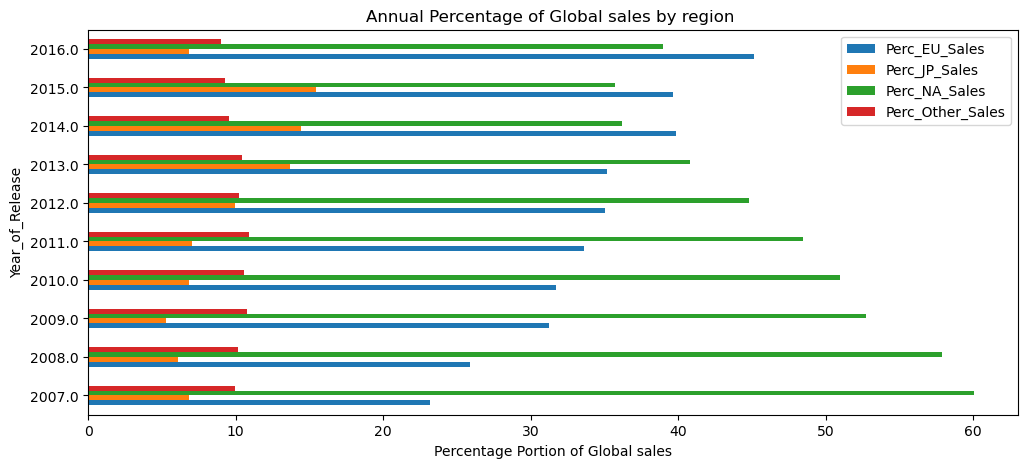

In [41]:
pt.tail(10).plot(kind='barh', figsize=(12, 5) ,title='Annual Percentage of Global sales by region ')\
.set_xlabel('Percentage Portion of Global sales')

In [42]:
df1.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Perc_NA_Sales,Perc_EU_Sales,Perc_JP_Sales,Perc_Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,322.0,Nintendo,E,50.109038,35.086019,4.567482,10.237461


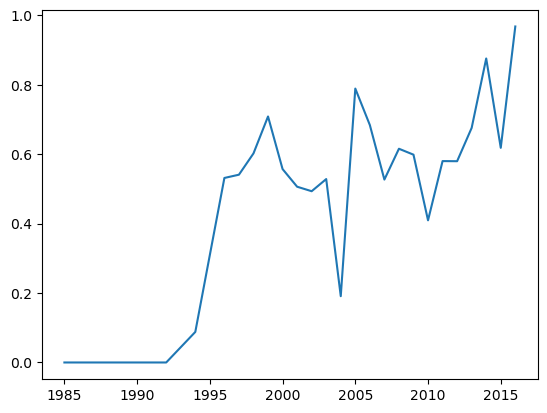

In [43]:

by_year = df1.groupby('Year_of_Release')

def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept']= 1
    result = sm.OLS(Y,X).fit()
    return result.params

A= by_year.apply(regress,'EU_Sales',['NA_Sales'])
A['Year']=A.index

A
plt.plot(A['Year'],A['NA_Sales'])




In [44]:
df1.pivot_table(['Global_Sales','Critic_Score','Critic_Count'],index=['Developer','Year_of_Release'],columns='Rating',fill_value=0)

Critic_Count             \
Rating                                                          AO    E  E10+   
Developer                             Year_of_Release                           
10tacle Studios, Fusionsphere Systems 2008.0                     0  0.0   0.0   
1C, 1C Company                        2001.0                     0  0.0   0.0   
                                      2003.0                     0  0.0   0.0   
1C, Ino-Co, 1C Company                2009.0                     0  0.0   0.0   
1C: Maddox Games                      2006.0                     0  0.0   0.0   
...                                                            ...  ...   ...   
neo Software                          2001.0                     0  0.0   0.0   
odenis studio                         2007.0                     0  0.0  28.0   
syn Sophia                            2008.0                     0  4.0   0.0   
                                      2012.0                     0  5.0   0.0   
zSlide                                2007.0                     0  0.0   0.0   

                                                                          \
Rating                                                K-A     M RP     T   
Developer                             Year_of_Release                      
10tacle Studios, Fusionsphere Systems 2008.0            0   0.0  0   9.0   
1C, 1C Company                        2001.0            0   0.0  0  12.0   
                                      2003.0            0   0.0  0  12.0   
1C, Ino-Co, 1C Company                2009.0            0   0.0  0  31.0   
1C: Maddox Games                      2006.0            0   0.0  0   9.0   
...                                                    ..   ... ..   ...   
neo Software                          2001.0            0  24.0  0   0.0   
odenis studio                         2007.0            0   0.0  0   0.0   
syn Sophia                            2008.0            0   0.0  0   0.0   
                                      2012.0            0   0.0  0   0.0   
zSlide                                2007.0            0   0.0  0  35.0   

                                                      Critic_Score        \
Rating                                                          AO     E   
Developer                             Year_of_Release                      
10tacle Studios, Fusionsphere Systems 2008.0                     0   0.0   
1C, 1C Company                        2001.0                     0   0.0   
                                      2003.0                     0   0.0   
1C, Ino-Co, 1C Company                2009.0                     0   0.0   
1C: Maddox Games                      2006.0                     0   0.0   
...                                                            ...   ...   
neo Software                          2001.0                     0   0.0   
odenis studio                         2007.0                     0   0.0   
syn Sophia                            2008.0                     0  73.0   
                                      2012.0                     0  76.0   
zSlide                                2007.0                     0   0.0   

                                                             ...           \
Rating                                                 E10+  ...     M RP   
Developer                             Year_of_Release        ...            
10tacle Studios, Fusionsphere Systems 2008.0            0.0  ...   0.0  0   
1C, 1C Company                        2001.0            0.0  ...   0.0  0   
                                      2003.0            0.0  ...   0.0  0   
1C, Ino-Co, 1C Company                2009.0            0.0  ...   0.0  0   
1C: Maddox Games                      2006.0            0.0  ...   0.0  0   
...                                                     ...  ...   ... ..   
neo Software                          2001.0            0.0  ...  89.0  0   
odenis studio      

In [45]:

df1.pivot_table(['NA_Sales','EU_Sales'],index=['Platform','Genre']
                ,columns='Year_of_Release',fill_value=0,margins=True)

EU_Sales                                                   \
Year_of_Release       1985.0 1988.0 1992.0 1994.0    1996.0    1997.0  1998.0   
Platform Genre                                                                  
3DS      Action         0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Adventure      0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Fighting       0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Misc           0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Platform       0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
...                      ...    ...    ...    ...       ...       ...     ...   
XOne     Shooter        0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Simulation     0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Sports         0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
         Strategy       0.00   0.00      0   0.00  0.000000  0.000000  0.0000   
All                     0.03   0.02      0   0.26  0.982857  0.666923  0.4852   

                                               ...  NA_Sales            \
Year_of_Release     1999.0    2000.0   2001.0  ...    2008.0    2009.0   
Platform Genre                                 ...                       
3DS      Action      0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Adventure   0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Fighting    0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Misc        0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Platform    0.000  0.000000  0.00000  ...  0.000000  0.000000   
...                    ...       ...      ...  ...       ...       ...   
XOne     Shooter     0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Simulation  0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Sports      0.000  0.000000  0.00000  ...  0.000000  0.000000   
         Strategy    0.000  0.000000  0.00000  ...  0.000000  0.000000   
All                  0.523  0.247059  0.28457  ...  0.432855  0.421309   

                                                                       \
Year_of_Release        2010.0    2011.0    2012.0    2013.0    2014.0   
Platform Genre                                                          
3DS      Action      0.000000  0.203750  0.331538  0.481250  0.071667   
         Adventure   0.000000  0.073333  0.080000  0.175000  0.000000   
         Fighting    0.000000  0.190000  0.060000  0.000000  0.000000   
         Misc        0.000000  0.100000  0.220000  0.620000  0.155000   
         Platform    0.000000  0.973333  0.967500  0.113333  0.545000   
...                       ...       ...       ...       ...       ...   
XOne     Shooter     0.000000  0.000000  0.000000  1.565000  1.169000   
         Simulation  0.000000  0.000000  0.000000  0.000000  0.000000   
         Sports      0.000000  0.000000  0.000000  0.485000  0.471000   
         Strategy    0.000000  0.000000  0.000000  0.110000  0.000000   
All                  0.497063  0.420795  0.427923  0.454474  0.313755   

                                                   
Year_of_Release        2015.0    2016.0       All  
Platform Genre                                     
3DS      Action      0.348000  0.066667  0.259074  
         Adventure   0.000000  0.050000  0.086667  
         Fighting    0.120000  0.000000  0.161429  
         Misc        0.160000  0.080000  0.179000  
         Platform    0.045000  0.140000  0.631667  
...                       ...       ...       ...  
XOne     Shooter     1.194286  0.580000  0.985333  
         Simulation  0.000000  0.000000  0.000000  
         Sports      0.652222  0.373750  0.500323  
         Strategy    0.000000  0.020000  0.065000  
All                  0.321564  0.162830  0.394484  

[198 rows x 52 columns]

In [46]:
# Linear regression (OLS) to identify the impact of NA_Sales on EU_Sales

In [47]:
X1 =sm.add_constant(df1['NA_Sales'])
reg =sm.OLS(df1['EU_Sales'],df1['NA_Sales']).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               EU_Sales   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                          1.936e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:20:21   Log-Likelihood:                         -2916.5
No. Observations:                6825   AIC:                                      5835.
Df Residuals:                    6824   BIC:                                      5842.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NA_Sales       0.5982      0.004    139.144      0.000       0.590       0.607
==============================================================================
Omnibus:                     6862.510   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1768547.324
Skew:                           4.374   Prob(JB):                         0.00
Kurtosis:                      81.374   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X1 =sm.add_constant(df1['Critic_Score'])
reg =sm.OLS(df1['User_Score'],df1['Critic_Score']).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             User_Score   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          2.086e+05
Date:                Mon, 15 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:20:21   Log-Likelihood:                         -11498.
No. Observations:                6825   AIC:                                  2.300e+04
Df Residuals:                    6824   BIC:                                  2.300e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Critic_Score     0.1007      0.000    456.694      0.000       0.100       0.101
==============================================================================
Omnibus:                      315.084   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.521
Skew:                          -0.352   Prob(JB):                    3.57e-129
Kurtosis:                       4.259   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# from sklearn.linear_model import LinearRegression
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming df1 is your DataFrame
# X = df1['Critic_Score'].values.reshape(-1, 1)
# y = df1['User_Score'].values.reshape(-1, 1)

# # Create a linear regression model
# model = LinearRegression()

# # Fit the model to your data
# model.fit(X, y)

# # Make predictions
# predictions = model.predict(X)

# # Plot the regression line
# plt.figure(figsize=(10, 6))
# plt.scatter(X, y, color='black')
# plt.plot(X, predictions, color='blue', linewidth=3)
# plt.title('Linear Regression - User_Score vs Critic_Score')
# plt.xlabel('Critic_Score')
# plt.ylabel('User_Score')
# plt.show()

# # Display coefficients and intercept
# print(f'Coefficients: {model.coef_[0][0]}')
# print(f'Intercept: {model.intercept_[0]}')


In [50]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Assuming df1 is your DataFrame
# X = df1['Critic_Score'].values.reshape(-1, 1)
# y = df1['User_Score'].values.reshape(-1, 1)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a linear regression model
# model = LinearRegression()

# # Train the model on the training set
# model.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display coefficients, intercept, and evaluation metrics
# print(f'Coefficients: {model.coef_[0][0]}')
# print(f'Intercept: {model.intercept_[0]}')
# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')


In [51]:
X = df1['Critic_Score'].values.reshape(-1, 1)
y = df1['User_Score'].values.reshape(-1, 1)


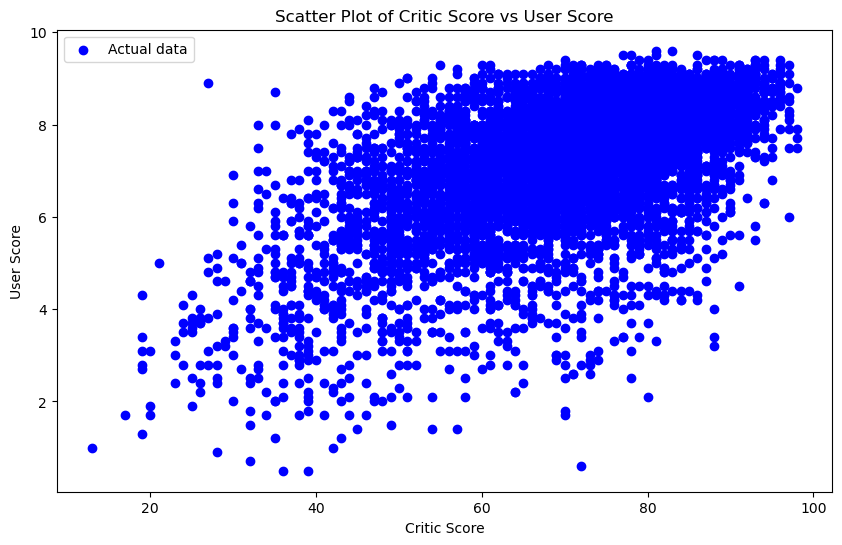

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.title('Scatter Plot of Critic Score vs User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.legend()
plt.show()


In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5460, 1)
X_test shape: (1365, 1)
y_train shape: (5460, 1)
y_test shape: (1365, 1)


In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
y_pred = model.predict(X_test)


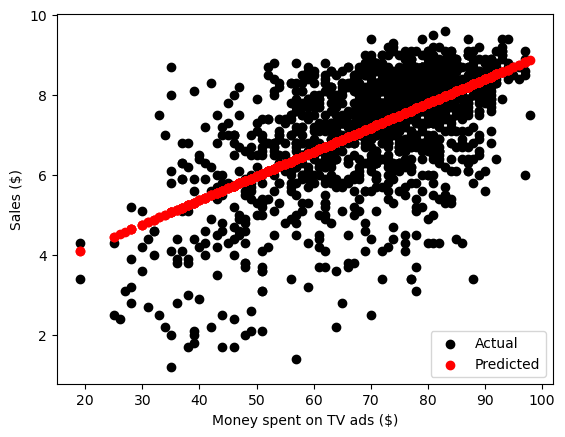

In [56]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()


In [57]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Coefficient (Slope): {slope}")
print(f"Intercept: {intercept}")


Coefficient (Slope): [0.06052599]
Intercept: [2.94381662]


In [58]:
intercept = model.intercept_
print(f"Intercept: {intercept}")


Intercept: [2.94381662]


In [59]:
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")


R-squared: 0.32535950382421197


In [60]:
predicted_values = reg.predict(X_test)
print(predicted_values)


[9.46391856 7.45031887 8.5577987  ... 6.94691894 3.72515943 7.65167884]
